In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

In [5]:
counties_2018 = pd.read_excel("data/ticks_data_summary.xlsx", sheet_name=5, header=1, converters={'FIPSCode':str})

In [6]:
counties_2018.head(10)

,FIPSCode,State,County,Ixodes_scapularis_County_Status,Ixodes_scapularis_data_source,Ixodes_pacificus_county_status,Ixodes_pacificus_data_source
0,01001,AL,Autauga County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data
1,01003,AL,Baldwin County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data
2,01005,AL,Barbour County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data
3,01007,AL,Bibb County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data
4,01009,AL,Blount County,No records,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data
5,01011,AL,Bullock County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data
6,01013,AL,Butler County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data
7,01015,AL,Calhoun County,No records,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data
8,01017,AL,Chambers County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data
9,01019,AL,Cherokee County,No records,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data


In [7]:
counties_2018['Tick Species Reported'] = counties_2018['Ixodes_scapularis_County_Status'] + "-" + counties_2018['Ixodes_pacificus_county_status']
counties_2018.loc[counties_2018['Tick Species Reported'] == 'Established-No records', 'Tick Species Reported'] = "Ixodes scapularis (Established)"
counties_2018.loc[counties_2018['Tick Species Reported'] == 'Reported-No records', 'Tick Species Reported'] = "Ixodes scapularis (Reported)"
counties_2018.loc[counties_2018['Tick Species Reported'] == 'No records-Established', 'Tick Species Reported'] = "Ixodes pacificus (Established)"
counties_2018.loc[counties_2018['Tick Species Reported'] == 'No records-Reported', 'Tick Species Reported'] = "Ixodes pacificus (Reported)"
counties_2018.loc[counties_2018['Tick Species Reported'] == 'No records-No records', 'Tick Species Reported'] = "No records"

In [8]:
counties_2018.head()

,FIPSCode,State,County,Ixodes_scapularis_County_Status,Ixodes_scapularis_data_source,Ixodes_pacificus_county_status,Ixodes_pacificus_data_source,Tick Species Reported
0,01001,AL,Autauga County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data,Ixodes scapularis (Established)
1,01003,AL,Baldwin County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data,Ixodes scapularis (Established)
2,01005,AL,Barbour County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data,Ixodes scapularis (Established)
3,01007,AL,Bibb County,Established,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data,Ixodes scapularis (Established)
4,01009,AL,Blount County,No records,CDC ArboNET Tick Module historical data,No records,CDC ArboNET Tick Module historical data,No records


In [10]:
established_2018 = counties_2018['FIPSCode'].loc[counties_2018['Ixodes_scapularis_County_Status'] == 'Established'].tolist()
reported_2018 = counties_2018['FIPSCode'].loc[counties_2018['Ixodes_scapularis_County_Status'] == 'Reported'].tolist()
no_records_2018 = counties_2018['FIPSCode'].loc[counties_2018['Ixodes_scapularis_County_Status'] == 'No records'].tolist()

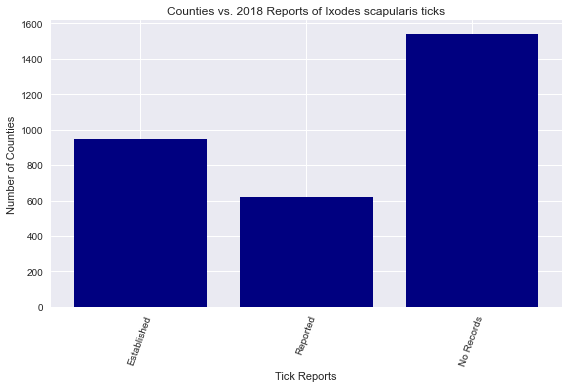

In [11]:
plt.bar(['Established', 'Reported', 'No Records'],[len(established_2018), len(reported_2018), len(no_records_2018)],color='#000080')
plt.xticks(rotation=70)
plt.xlabel('Tick Reports')
plt.ylabel('Number of Counties')
plt.title("Counties vs. 2018 Reports of Ixodes scapularis ticks")
plt.tight_layout()
#plt.savefig('.png')
plt.show()